# BIRDS

This is a small project utilizing the differenet GenAI architectures to generate new bird common names.

In [1]:
s = 'The potato is a starchy root vegetable native to the Americas that is consumed as a staple food in many parts of the world. Potatoes are tubers of the plant Solanum tuberosum, a perennial in the nightshade family Solanaceae.[3]'
l = list(map(int, s.encode('utf-8')))
print(l)

[84, 104, 101, 32, 112, 111, 116, 97, 116, 111, 32, 105, 115, 32, 97, 32, 115, 116, 97, 114, 99, 104, 121, 32, 114, 111, 111, 116, 32, 118, 101, 103, 101, 116, 97, 98, 108, 101, 32, 110, 97, 116, 105, 118, 101, 32, 116, 111, 32, 116, 104, 101, 32, 65, 109, 101, 114, 105, 99, 97, 115, 32, 116, 104, 97, 116, 32, 105, 115, 32, 99, 111, 110, 115, 117, 109, 101, 100, 32, 97, 115, 32, 97, 32, 115, 116, 97, 112, 108, 101, 32, 102, 111, 111, 100, 32, 105, 110, 32, 109, 97, 110, 121, 32, 112, 97, 114, 116, 115, 32, 111, 102, 32, 116, 104, 101, 32, 119, 111, 114, 108, 100, 46, 32, 80, 111, 116, 97, 116, 111, 101, 115, 32, 97, 114, 101, 32, 116, 117, 98, 101, 114, 115, 32, 111, 102, 32, 116, 104, 101, 32, 112, 108, 97, 110, 116, 32, 83, 111, 108, 97, 110, 117, 109, 32, 116, 117, 98, 101, 114, 111, 115, 117, 109, 44, 32, 97, 32, 112, 101, 114, 101, 110, 110, 105, 97, 108, 32, 105, 110, 32, 116, 104, 101, 32, 110, 105, 103, 104, 116, 115, 104, 97, 100, 101, 32, 102, 97, 109, 105, 108, 121, 32, 83, 

In [2]:
max(l), min(l)

(121, 32)

In [3]:
def byte_pair_encoding2(l):
    pairs = {}
    for a,b in zip(l,l[1:]):
        pairs[(a,b)] = pairs.get((a,b), 0) + 1

    max_pair = 0
    max_count = 0
    for k,v in pairs.items():
        if v > max_count:
            max_pair = k
            max_count = v
    # print(max_pair, max_count)
    if max_count < 2:
        return l, None

    y = max_pair[1]
    m = 0
    while y:
        y = (y-1) // 256
        m += 1
    
    nl = []
    i = 0
    new_token = max_pair[0] * 256**m + max_pair[1]
    while i < len(l):
        if i < len(l) - 1 and (l[i],l[i+1]) == max_pair:
            nl.append(new_token)
            i += 2
        else:
            nl.append(l[i])
            i += 1

    return nl, new_token

In [4]:
nl = l
print(len(nl))
for i in range(50):
    nl, new_token = byte_pair_encoding2(nl)
    if new_token:
        print(len(nl), len(set(nl)), new_token)
        print('')

227
217 32 25888

210 33 29472

205 34 6841632

200 35 29793

195 36 8308

191 37 8297

187 38 139391952160

183 39 25970

179 40 24942

176 41 29807

173 42 7544929

170 42 31008

167 43 30061

164 44 7102830

162 45 7304289

160 45 478693913711

158 46 1931501856

156 46 494464475251

154 46 32405223850079329

152 47 28527

150 48 29728

148 49 7103776

146 50 24948

144 51 7566701

142 52 8289

140 53 2124142

138 54 7544943

136 54 1931505510

134 54 2123712767497804997920

132 54 30050

130 54 1969382770

128 54 21359

126 54 358351659374

124 55 28265



In [5]:
def dec(x):
    c = []
    while x:
        c.append(((x-1) % 256)+1)
        x = (x-1) // 256
        print(x, c)
    c = c[::-1]
    x = max(nl)
    return bytes(c).decode('utf-8')
print(dec(max(nl)))

8295752998038300773 [32]
32405285148587112 [32, 101]
126583145111668 [32, 101, 104]
494465410592 [32, 101, 104, 116]
1931505510 [32, 101, 104, 116, 32]
7544943 [32, 101, 104, 116, 32, 102]
29472 [32, 101, 104, 116, 32, 102, 111]
115 [32, 101, 104, 116, 32, 102, 111, 32]
0 [32, 101, 104, 116, 32, 102, 111, 32, 115]
s of the 


In [6]:
def byte_pair_encoding(l, n):
    pairs = {}
    for a,b in zip(l,l[1:]):
        if not pairs.get((a,b)):
            pairs[(a,b)] = 1
        else:
            pairs[(a,b)] += 1

    max_pair = 0
    max_count = 0
    for k,v in pairs.items():
        if v > max_count:
            max_pair = k
            max_count = v
    
    nl = []
    i = 0
    new_token = max_pair[0] * 256**n + max_pair[1]
    while i < len(l):
        if i < len(l) - 1 and (l[i],l[i+1]) == max_pair:
            nl.append(new_token)
            i += 2
        else:
            nl.append(l[i])
            i += 1

    return nl

In [7]:
nl = l
for i in range(10):
    nl = byte_pair_encoding(nl, i)
    print(len(nl), nl)
    print(len(set(nl)), set(nl))
    print('')

217 [84, 104, 133, 112, 111, 116, 97, 116, 111, 32, 105, 115, 32, 97, 32, 115, 116, 97, 114, 99, 104, 121, 32, 114, 111, 111, 116, 32, 118, 101, 103, 101, 116, 97, 98, 108, 133, 110, 97, 116, 105, 118, 133, 116, 111, 32, 116, 104, 133, 65, 109, 101, 114, 105, 99, 97, 115, 32, 116, 104, 97, 116, 32, 105, 115, 32, 99, 111, 110, 115, 117, 109, 101, 100, 32, 97, 115, 32, 97, 32, 115, 116, 97, 112, 108, 133, 102, 111, 111, 100, 32, 105, 110, 32, 109, 97, 110, 121, 32, 112, 97, 114, 116, 115, 32, 111, 102, 32, 116, 104, 133, 119, 111, 114, 108, 100, 46, 32, 80, 111, 116, 97, 116, 111, 101, 115, 32, 97, 114, 133, 116, 117, 98, 101, 114, 115, 32, 111, 102, 32, 116, 104, 133, 112, 108, 97, 110, 116, 32, 83, 111, 108, 97, 110, 117, 109, 32, 116, 117, 98, 101, 114, 111, 115, 117, 109, 44, 32, 97, 32, 112, 101, 114, 101, 110, 110, 105, 97, 108, 32, 105, 110, 32, 116, 104, 133, 110, 105, 103, 104, 116, 115, 104, 97, 100, 133, 102, 97, 109, 105, 108, 121, 32, 83, 111, 108, 97, 110, 97, 99, 101, 97, 

In [8]:
with open('../data/ww2_wiki.txt', 'r') as f:
    s1 = f.read()

0 171340 131 25888
100 106928 228 55763056041485705397352493
200 92472 325 3654487640734807188920892993581
300 83604 421 20863381838318493070894964563257903799710469096205327396406608937112503807520
400 77412 519 20863381838318493070894964563257903799710469096205327396406608937112503807520
500 72890 616 20863381838318493070894964563257903799710469096205327396406608937112503807520
600 69370 714 20863381838318493070894964563257903799710469096205327396406608937112503807520
700 66480 812 20863381838318493070894964563257903799710469096205327396406608937112503807520
800 64011 912 20863381838318493070894964563257903799710469096205327396406608937112503807520
900 61903 1009 20863381838318493070894964563257903799710469096205327396406608937112503807520


Text(0, 0.5, 'vocab size')

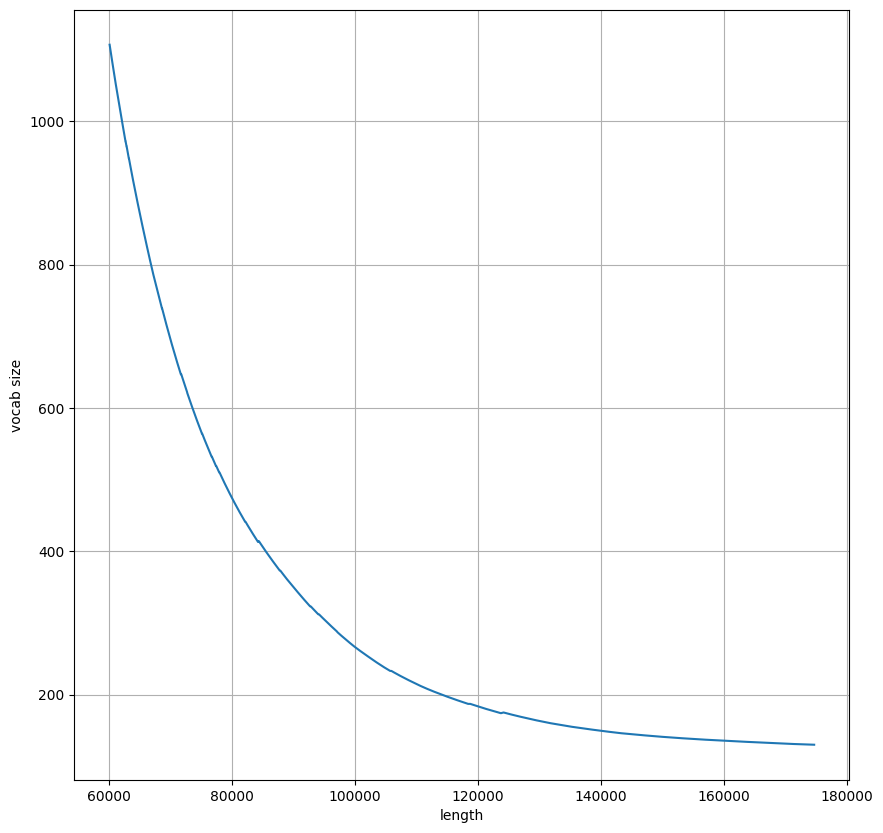

In [9]:
x, y = [], []
nl = list(map(int, s1.encode('utf-8')))

x.append(len(nl))
y.append(len(set(nl)))
for i in range(1000):
    nl,_ = byte_pair_encoding2(nl)
    x.append(len(nl))
    y.append(len(set(nl)))
    if i % 100 == 0:
        print(i, len(nl), len(set(nl)), max(nl))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.grid()
plt.xlabel('length')
plt.ylabel('vocab size')

In [10]:
dec(31647743033503520)

123623996224623 [32]
482906235252 [32, 111]
1886352481 [32, 111, 116]
7368564 [32, 111, 116, 97]
28783 [32, 111, 116, 97, 116]
112 [32, 111, 116, 97, 116, 111]
0 [32, 111, 116, 97, 116, 111, 112]


'potato '

0 171340 130 [10, 10, 87, 105, 107, 105, 112, 101, 100, 105, 97, 84, 104, 133, 70, 114, 101, 133, 69, 110, 99, 121, 99, 108, 111, 112, 101, 100, 105, 97, 10, 83, 101, 97, 114, 99, 104, 32, 87, 105, 107, 105, 112, 101, 100, 105, 97, 10, 83, 101, 97, 114, 99, 104, 10, 68, 111, 110, 97, 116, 101, 10, 67, 114, 101, 97, 116, 133, 97, 99, 99, 111, 117, 110, 116, 10, 76, 111, 103, 32, 105, 110, 10, 10, 67, 111, 110, 116, 101, 110, 116, 115, 32, 104, 105, 100, 101, 10, 40, 84, 111, 112, 41, 10, 83, 116, 97, 114, 116, 32, 97, 110, 100, 32, 101, 110, 100, 32, 100, 97, 116, 101, 115, 10, 66, 97, 99, 107, 103, 114, 111, 117, 110, 100, 10, 10, 80, 114, 101, 45, 119, 97, 114, 32, 101, 118, 101, 110, 116, 115, 10, 10, 67, 111, 117, 114, 115, 133, 111, 102, 32, 116, 104, 133, 119, 97, 114, 10, 10, 65, 102, 116, 101, 114, 109, 97, 116, 104, 10, 73, 109, 112, 97, 99, 116, 10, 10, 83, 101, 133, 97, 108, 115, 111, 10, 78, 111, 116, 101, 115]
50 121676 178 [10, 10, 87, 105, 107, 105, 112, 101, 100, 105, 97

Text(0, 0.5, 'vocab size')

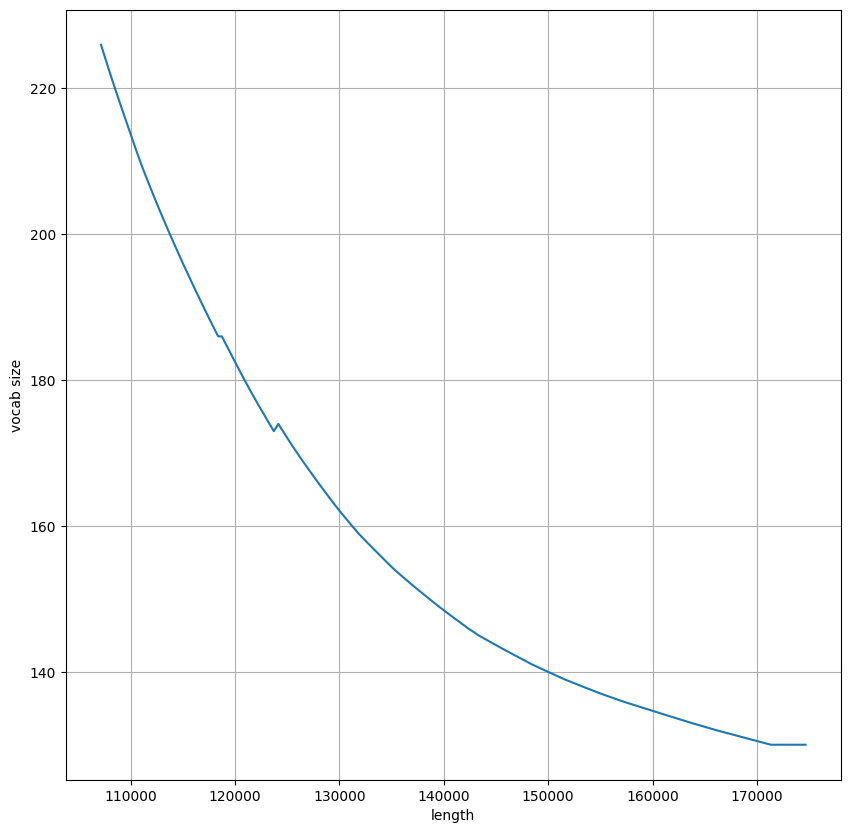

In [11]:
x, y = [], []
nl = list(map(int, s1.encode('utf-8')))

x.append(len(nl))
y.append(len(set(nl)))
for i in range(100):
    nl = byte_pair_encoding(nl, i)
    x.append(len(nl))
    y.append(len(set(nl)))
    if i % 50 == 0:
        print(i, len(nl), len(set(nl)), nl[:200])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.grid()
plt.xlabel('length')
plt.ylabel('vocab size')